## Exp 3: a simple classifier with the barcode dataset
### Rewrite exp3 using pure Tensorflow.
### The output layer is a regression layer

In [1]:
from __future__ import print_function
from __future__ import absolute_import
import matplotlib.pyplot as plt

import sugartensor as tf
import os
from IPython.display import display, Image
import numpy as np
from scipy import ndimage
from six.moves import cPickle as pickle

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"
%matplotlib inline


In [2]:
batch_size = 64   # batch size
image_size = 32
pixel_depth = 255.0

## Training data

In [3]:
dir= "barcode/train/"
fn = os.listdir(dir)
total = len(fn)
total
#     change the range to switch between exp2 : [0, 1, 2, 3, 4, 5, 6]
#     and exp2.1: [1, 3, 5, 7, 9]
visible = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# put all the images into this blob of size total*size*size*1
# REMEMBER to change shape of dataset
training_dataset = np.ndarray(shape = (3000*len(visible), image_size, image_size, 1), dtype = np.float32)
counter = 0
# REMEMBER to change shape of training label
training_label = np.ndarray(shape = (3000*len(visible)), dtype = np.float32)
for file in fn:
    image_data = (ndimage.imread(dir+file).astype(float) - 
                    pixel_depth / 2) / pixel_depth

    if int(file[0]) in visible:
        training_label[counter] = int(file[0])
        training_dataset[counter, :, :] = image_data[:,:,0].reshape(image_size, image_size, 1)
        counter+=1

## Validation data

3000
[ 8.  1.  7.  1.]


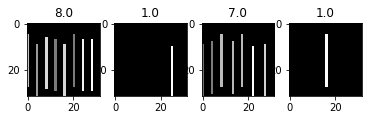

In [4]:
dir= "barcode/valid/"
fn = os.listdir(dir)
total = len(fn)
total
valid_label = np.ndarray(shape = (total), dtype = np.float32)
valid_dataset = np.ndarray(shape = (total, image_size, image_size, 1), dtype = np.float32)
counter = 0
for file in fn:
    image_data = (ndimage.imread(dir+file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
    if True:
        valid_label[counter] = int(file[0])
        valid_dataset[counter, :, :] = image_data[:,:,0].reshape(image_size, image_size, 1)
        counter+=1
print(len(valid_label))

_, axs = plt.subplots(1, 4)

label = valid_label[:4]
image = valid_dataset[:4]
print(label)
for i in range(4):
    axs[i].imshow(image[i].reshape(image_size, image_size), cmap=plt.cm.Greys);
    axs[i].set_title(label[i])


In [5]:
# input images and label
def regressor(tensor):
    with tf.sg_context(name='discriminator', size=4, stride=2, act='leaky_relu'):
        logit = (tensor                
                  .sg_conv(dim=64, name = 'conv2')
                  .sg_conv(dim=128, name='conv3')
                  .sg_flatten()
                .sg_dense(dim=1, act = 'sigmoid', name = 'value'))
    return logit

In [6]:
X = tf.placeholder(shape = (1, image_size, image_size, 1), dtype = tf.float32)
Y = tf.placeholder(shape = (1), dtype = tf.float32)
print(X, Y)
logit = regressor(X)
# loss = logit.sg_mse(target = y, name = 'disc_loss').sg_mean(dims = 1)
loss = tf.reduce_sum(tf.pow(Y-logit, 2), name = "disc_loss")/2
print(loss)
# limit gpu
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


Tensor("Placeholder:0", shape=(1, 32, 32, 1), dtype=float32) Tensor("Placeholder_1:0", shape=(1,), dtype=float32)
Tensor("truediv:0", shape=(), dtype=float32)


In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)
display_step = 500
init = tf.global_variables_initializer()
with sess:
    sess.run(init)
    for epoch in range(100):
        print(epoch)
        for (x, y) in zip(training_dataset, training_label):
            x = x.reshape(1, 32, 32, 1)
            y = y.reshape(1,)
            sess.run(optimizer, feed_dict={X:x, Y:y})
        c = sess.run(loss, feed_dict={X: x, Y:y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

0
Epoch: 0001 cost= 18.014999390
1
Epoch: 0002 cost= 18.005813599
2
Epoch: 0003 cost= 18.003450394
3
Epoch: 0004 cost= 18.002408981
4
Epoch: 0005 cost= 18.001832962
5
Epoch: 0006 cost= 18.001478195
6
Epoch: 0007 cost= 18.001230240
7
Epoch: 0008 cost= 18.001052856
8
Epoch: 0009 cost= 18.000921249
9
Epoch: 0010 cost= 18.000816345
10
Epoch: 0011 cost= 18.000732422
11
Epoch: 0012 cost= 18.000667572
12
Epoch: 0013 cost= 18.000610352
13
Epoch: 0014 cost= 18.000560760
14
Epoch: 0015 cost= 18.000518799
15
Epoch: 0016 cost= 18.000486374
16
Epoch: 0017 cost= 18.000457764
17
Epoch: 0018 cost= 18.000431061
18
Epoch: 0019 cost= 18.000406265
19
Epoch: 0020 cost= 18.000387192
20
Epoch: 0021 cost= 18.000366211
21
Epoch: 0022 cost= 18.000349045
22
Epoch: 0023 cost= 18.000335693
23
Epoch: 0024 cost= 18.000320435
24
Epoch: 0025 cost= 18.000305176
25
Epoch: 0026 cost= 18.000293732
26
Epoch: 0027 cost= 18.000284195
27
Epoch: 0028 cost= 18.000276566
28
Epoch: 0029 cost= 18.000263214
29
Epoch: 0030 cost= 18.